In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
data = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [ ]:
x_train_normalized[0][20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09411765, 0.44705882, 0.86666667, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.78823529, 0.30588235, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
model = Sequential(
    [
      Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      MaxPooling2D((2, 2)),

      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),

      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),

      Flatten(),

      Dense(64, activation='relu'),
      Dense(10, activation='softmax')

    ],
    name = "cnn_model"
)

In [ ]:
model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 1, 1, 64)          0 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train_normalized, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2180 - accuracy: 0.9306
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0759 - accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0555 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0425 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 53s 29m

In [ ]:
score = model.evaluate(x_test_normalized, y_test)
print(score)

313/313 [==============================] - 3s 11ms/step - loss: 0.0550 - accuracy: 0.9871
[0.055046968162059784, 0.9871000051498413]


In [ ]:
pred = model.predict(x_test_normalized)

313/313 [==============================] - 3s 10ms/step


In [ ]:
print(pred)

[[8.2451268e-12 8.6320988e-06 8.8013144e-07 ... 9.9999028e-01
  1.6373775e-10 2.0416261e-08]
 [3.6359673e-09 9.7567430e-09 9.9999958e-01 ... 4.1716579e-08
  2.8670688e-09 2.7384386e-09]
 [7.2311837e-09 9.9999660e-01 4.4867380e-07 ... 4.8260978e-07
  5.8901151e-08 4.1240984e-08]
 ...
 [6.1661719e-19 1.7315393e-12 1.4476321e-17 ... 7.3898161e-15
  4.9310355e-14 1.3562374e-11]
 [2.3150104e-08 1.6633613e-11 3.5203539e-12 ... 2.1621019e-13
  2.3186031e-08 1.0919578e-08]
 [8.9084233e-09 2.1721572e-10 1.8831276e-08 ... 3.6516560e-15
  9.8792441e-10 3.2320757e-10]]


In [ ]:
print(np.argmax(pred[0]))

7


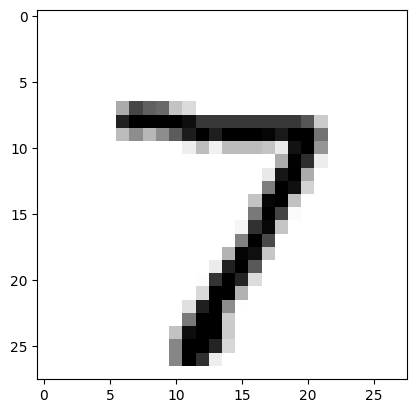

In [ ]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_test_normalized[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.save('model3')

In [ ]:
## Test model
model3 = tf.keras.models.load_model('model3')

In [ ]:
image_path = 'sebi_3.png'

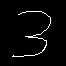

In [ ]:
image = Image.open(image_path).convert('L') #convert to greyscale
image

In [ ]:
image = image.resize((28, 28))
image

In [ ]:
image_array = np.array(image) / 255.0
#image_array = 1 - image_array

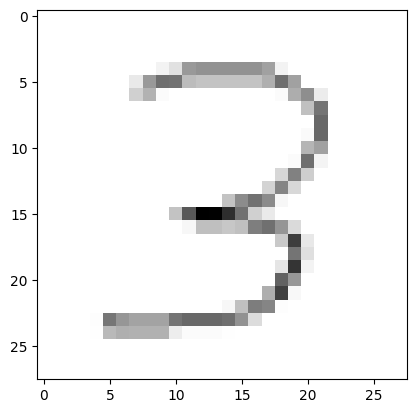

In [ ]:
plt.imshow(image_array, cmap=plt.cm.binary)
plt.show()

In [ ]:
image_input = image_array.reshape(1, 28, 28, 1).astype('float32')

In [ ]:
p = model3.predict(image_input)

1/1 [==============================] - 0s 104ms/step


In [ ]:
image

In [ ]:
print(np.argmax(p))

3


In [ ]:
print(p)

[[0.00179345 0.045282   0.07137347 0.7794313  0.01278057 0.0254225
  0.00420535 0.02057382 0.02679452 0.01234302]]


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import shutil

In [ ]:
shutil.copytree('/content/model3','/gdrive/MyDrive/ML/Models/HandwrittenDigitsModel')

'/gdrive/MyDrive/ML/Models/HandwrittenDigitsModel'

In [2]:
# Conclusions:
# Them model has been improved by changing the hidden layers from Dense to Convolutional layers with MaxPooling
# The model has a better accuracy now in detecting my own handwritten digits
# To do: Prevent overfitting, try data augmentation and regularization